# Installing packages

In [27]:
using Pkg
# Pkg.add("Plots")
# Pkg.add("MultivariateStats")
# Pkg.add("GLM")
# Pkg.add("DifferentialEquations")
# ]add DifferentialEquations

# Functions and multiple dispatch

The function below has 5 methods. Its output depends on the type of the input (without any conditional statement). This is multiple dispatch and improves performance.

In [ ]:
f(x,y) = 2x+y # Create an inline function
function f(x)
  x+2  
end # Long form definition
f(x::Int,y::Int) = 3x+2y

f(x::T,y::T) where {T<:Number}= 4x+10y
f(x::T,y::T2,z::T2) where {T<:Number,T2} = 5x + 5y + 5z


In [ ]:
f(2,3) # 3x+2y

In [ ]:
f(2.0,3) # 2x+y since 2.0 is not an Int

In [ ]:
f(2.0,3.0) # 4x+10y

In [ ]:
f(2, 3.0, 4.0) #5x + 5y + 5z

# Ordinary Differential Equations

In [1]:
using DifferentialEquations

In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Solving an ODE numerically

Step 1: Defining the problem

In [3]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

Step 2: Solve the problem

In [4]:
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Array{Float64,1}:
 0.0
 0.012407826196308189
 0.042501278333560696
 0.0817804940926822
 0.12887384498704435
 0.18409796286152927
 0.24627457447456758
 0.31479297816557983
 0.3885963515160237
 0.4668617724420117
 0.5487161305960653
 0.6334346972152323
 0.7203630000154827
 0.808957991167541
 0.8987655040395068
 0.9894161889652783
 1.0
u: 17-element Array{Float64,1}:
 0.5
 0.5063053789114713
 0.5219304750950854
 0.5430527156531716
 0.5695067765051011
 0.6021743618001767
 0.6412025634645868
 0.6871475244605603
 0.7403258398933249
 0.8012223416244076
 0.8702768595124217
 0.9480214633315531
 1.0350186537489083
 1.1319031171663114
 1.2393734610662304
 1.3582039071131542
 1.3728005076225747

Step 3: Analyze the solution

Accessing elements of the solution

In [6]:
sol[5] # The value at the fifth time step
sol.t[8]
[t+2u for (u,t) in zip(sol.u,sol.t)]
sol(0.45) # The value of the solution at t=0.45

0.7876927465687832

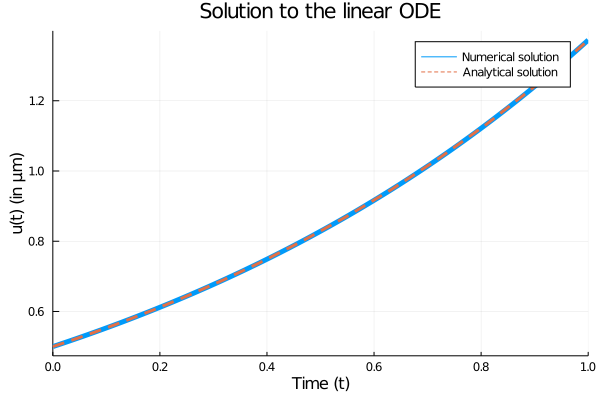

In [9]:
plot(sol,linewidth=5,title="Solution to the linear ODE",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="Numerical solution")

plot!(sol.t,t->0.5*exp(1.01t),lw=3,ls=:dash,label="Analytical solution")

## Sytems of equations

Define the problem

In [10]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [11]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 1294-element Array{Float64,1}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.0276899566248403
   0.041856345938267966
   0.06024040228733675
   0.08368539694547242
   0.11336497050342806
   0.14862178548871152
   0.18703974465019643
   ⋮
  99.15166031662457
  99.22514723290307
  99.31227549560941
  99.39403070915297
  99.47001147494375
  99.54379656909015
  99.614651558349
  99.69093823148101
  99.78733023233721
  99.86114450046736
  99.96115759510786
 100.0
u: 1294-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034

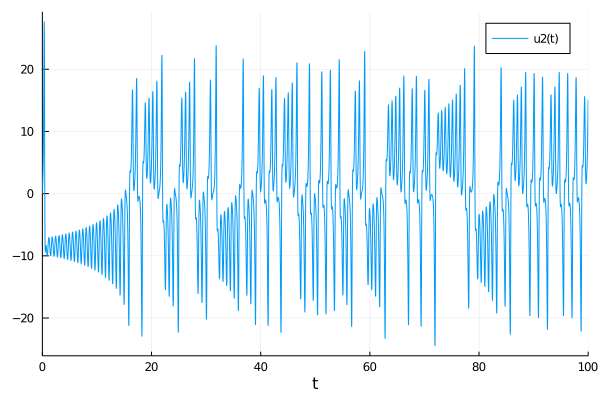

In [14]:
# plot(sol)
plot(sol,vars=(0,2)) #Here "variable 0" corresponds to the independent variable ("time")

Phase space plot

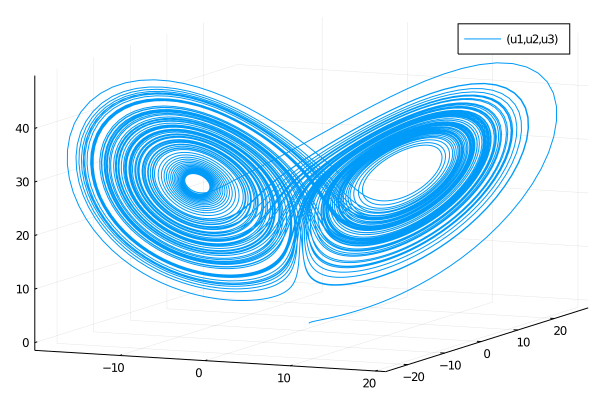

In [13]:
plot(sol,vars=(1,2,3))

## Parameterized systems

TIP: \alpha + tab results in Greek letters

In [16]:
function parameterized_lorenz(du,u,p,t)
  x,y,z = u
  σ,ρ,β = p
  du[1] = dx = σ*(y-x)
  du[2] = dy = x*(ρ-z) - y
  du[3] = dz = x*y - β*z
end
u0 = [1.0,0.0,0.0]
tspan = (0.0,1.0)
p = [10.0,28.0,8/3]
prob = ODEProblem(parameterized_lorenz,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [1.0, 0.0, 0.0]

In [17]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 28-element Array{Float64,1}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624077544510573
 0.009058075635317072
 0.01695646895607931
 0.0276899566248403
 0.041856345938267966
 0.06024040228733675
 0.08368539694547242
 0.11336497050342806
 0.14862178548871152
 0.18703974465019643
 ⋮
 0.37221152547525677
 0.4201372705729432
 0.4637203592547958
 0.5049460289663918
 0.5570622537949965
 0.6068387449874374
 0.6690203938696947
 0.7276640840586802
 0.798854234447563
 0.8763207996400417
 0.9661628933695969
 1.0
u: 28-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034242593451028745]
 [0.84833098777

## Pseudo-code definition

In [19]:
using ParameterizedFunctions
g = @ode_def begin
  dx = σ*(y-x)
  dy = x*(ρ-z) - y
  dz = x*y - β*z
end σ ρ β
u0 = [1.0;0.0;0.0]
tspan = (0.0,1.0)
p = [10.0,28.0,8/3]
prob = ODEProblem(g,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [1.0, 0.0, 0.0]

# Stochastic Differential Equations

# Parameter Estimation

In [28]:
Pkg.add("DiffEqSensitivty")
# using DiffEqSensitivty


LoadError: The following package names could not be resolved:
 * DiffEqSensitivty (not found in project, manifest or registry)


In [25]:
using DiffEqBayes

┌ Info: Precompiling DiffEqBayes [ebbdde9d-f333-5424-9be2-dbf1e9acfb5e]
└ @ Base loading.jl:1278
┌ Warning: Module DiffEqBase with build ID 850885075268759 is missing from the cache.
│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Info: Skipping precompilation since __precompile__(false). Importing DiffEqBayes [ebbdde9d-f333-5424-9be2-dbf1e9acfb5e].
└ @ Base loading.jl:1034
┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1278
┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1278
┌ Info: Precompiling NamedArrays [86f7a689-2022-50b4-a561-43c23ac3c673]
└ @ Base loading.jl:1278
┌ Info: Precompiling ApproxBayes [f5f396d3-230c-5e07-80e6-9fadf06146cc]
└ @ Base loading.jl:1278
